In [8]:
! pip install chembl_webresource_client
! pip install rdkit
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem.MolStandardize import rdMolStandardize
from chembl_webresource_client.new_client import new_client
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 49.1 MB/s eta 0:00:00:00:0100:01


In [9]:
target = new_client.target
target_query = target.search('CHEMBL2431')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Serine/threonine-protein kinase AKT2,12.0,False,CHEMBL2431,"[{'accession': 'P31751', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Serine/threonine-protein kinase Rac alpha/beta,8.0,False,CHEMBL4106175,"[{'accession': 'P31751', 'component_descriptio...",PROTEIN FAMILY,9606
2,[],Homo sapiens,Serine/threonine-protein kinase AKT,7.0,False,CHEMBL2111353,"[{'accession': 'P31751', 'component_descriptio...",PROTEIN FAMILY,9606
3,[],Homo sapiens,CRBN/AKT2,0.0,False,CHEMBL5169082,"[{'accession': 'P31751', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606


In [10]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL2431'

In [11]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [12]:
df = pd.DataFrame.from_dict(res)
df.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1421464,[],CHEMBL832703,Inhibitory concentration against Akt3 kinase,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase AKT2,9606,None,None,IC50,nM,UO_0000065,None,50000.0
1,None,None,1421467,[],CHEMBL832703,Inhibitory concentration against Akt3 kinase,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase AKT2,9606,None,None,IC50,nM,UO_0000065,None,2200.0
2,None,None,1421470,[],CHEMBL832703,Inhibitory concentration against Akt3 kinase,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase AKT2,9606,None,None,IC50,nM,UO_0000065,None,20000.0


In [13]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [14]:
df = df[df.standard_value.notna()]

In [15]:
df['standard_value'] = df['standard_value'].astype(float)
df['bioactivity_class'] = df['standard_value'].map(lambda x : 'active' if x <= 100 else ('inactive' if x >=10000 else 'intermediate'))

In [16]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value','bioactivity_class']
df = df[selection]
df.head(900)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL260397,Oc1nc2ccccc2n1C1CCN(Cc2ccc(-c3nc4ccccc4nc3-c3c...,50000.0,inactive
1,CHEMBL258844,O=c1[nH]c2ccccc2n1C1CCN(Cc2ccc(-c3nc4cc5[nH]cn...,2200.0,intermediate
2,CHEMBL178397,Cc1nc(-c2ccc(CN3CCC(n4c(=O)[nH]c5ccccc54)CC3)c...,20000.0,inactive
3,CHEMBL178468,CC(C)Cc1nc(-c2ccccc2)c(-c2ccc(CN3CCC(n4c(O)nc5...,20000.0,inactive
4,CHEMBL359864,Oc1nc2ccccc2n1C1CCN(Cc2ccc(-c3nc4ccccc4cc3-c3c...,50000.0,inactive
...,...,...,...,...
904,CHEMBL3703104,NC1(c2ccc(-c3nc4cc(-c5ccncc5)ccn4c3-c3ccccc3)c...,8.0,active
905,CHEMBL3703105,NC1(c2ccc(-c3nc4cc(-c5cccnc5)ccn4c3-c3ccccc3)c...,7.0,active
906,CHEMBL3703106,NC1(c2ccc(-c3nc4cc(-c5ccccn5)ccn4c3-c3ccccc3)c...,19.0,active
907,CHEMBL3703107,NC1(c2ccc(-c3nc4cc(-c5cc[nH]n5)ccn4c3-c3ccccc3...,23.0,active


In [17]:
'''
function to estimate molecule Lipinski descriptors

'''

def lipinski(smiles, verbose=False):
    moldata= []
    problematic_smiles=[]
    for i,elem in enumerate(smiles):
        try:
            mol=Chem.MolFromSmiles(elem) 
            mol = rdMolStandardize.Cleanup(mol)
            moldata.append(mol)  
        except:
            problematic_smiles.append(i)
            pass
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return  descriptors,problematic_smiles

In [18]:
df_lipinski, problematic_smiles = lipinski(df.canonical_smiles)

[22:51:33] Initializing MetalDisconnector
[22:51:33] Running MetalDisconnector
[22:51:33] Initializing Normalizer
[22:51:33] Running Normalizer
[22:51:33] Initializing MetalDisconnector
[22:51:33] Running MetalDisconnector
[22:51:33] Initializing Normalizer
[22:51:33] Running Normalizer
[22:51:33] Initializing MetalDisconnector
[22:51:33] Running MetalDisconnector
[22:51:33] Initializing Normalizer
[22:51:33] Running Normalizer
[22:51:33] Initializing MetalDisconnector
[22:51:33] Running MetalDisconnector
[22:51:33] Initializing Normalizer
[22:51:33] Running Normalizer
[22:51:33] Initializing MetalDisconnector
[22:51:33] Running MetalDisconnector
[22:51:33] Initializing Normalizer
[22:51:33] Running Normalizer
[22:51:33] Initializing MetalDisconnector
[22:51:33] Running MetalDisconnector
[22:51:33] Initializing Normalizer
[22:51:33] Running Normalizer
[22:51:33] Initializing MetalDisconnector
[22:51:33] Running MetalDisconnector
[22:51:33] Initializing Normalizer
[22:51:33] Running Nor

In [19]:
df_lipinski.head(10).style.background_gradient()

,MW,LogP,NumHDonors,NumHAcceptors
0,511.629000,6.856200,1.000000,6.000000
1,551.654000,6.320200,2.000000,6.000000
2,491.595000,4.892420,2.000000,5.000000
3,533.676000,6.607100,2.000000,7.000000
4,510.641000,7.461200,1.000000,5.000000
5,510.641000,7.461200,1.000000,5.000000
6,485.591000,5.767380,1.000000,5.000000
7,459.578000,6.095580,1.000000,6.000000
8,487.582000,6.682280,1.000000,4.000000
9,483.619000,6.851600,1.000000,4.000000


In [20]:
df = pd.concat([df,df_lipinski], axis=1)

In [21]:
def pIC50(i):
    molar = i*(10**-9) # Converts nM to M
    pIC50 = -np.log10(molar)
    return pIC50

In [22]:
df.standard_value.describe()

count      1167.000000
mean       4458.883145
std       24731.744030
min           0.200000
25%          20.000000
50%         101.000000
75%         682.000000
max      660000.000000
Name: standard_value, dtype: float64

In [24]:
df['norm_value'] = df['standard_value'].map(lambda x: 100000000 if x> 100000000 else x)
df['pIC50'] = df['norm_value'].map(pIC50)

In [26]:
preprocessed_df = df[df['bioactivity_class'] != 'intermediate']

In [27]:
preprocessed_df['bioactivity_class'].value_counts()

bioactivity_class
active      582
inactive    102
Name: count, dtype: int64

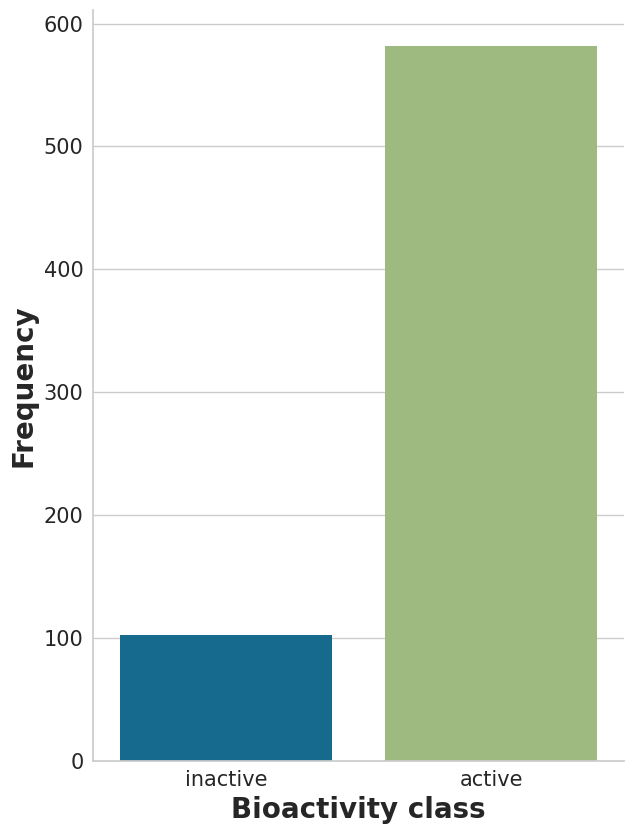

In [28]:
plt.figure(figsize=(6.5, 8.5))

sns.countplot(x='bioactivity_class', data=preprocessed_df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('Frequency', fontsize=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
sns.set(style='ticks')
sns.despine(top=True)
plt.tight_layout()
plt.savefig('plot_bioactivity_class.png')

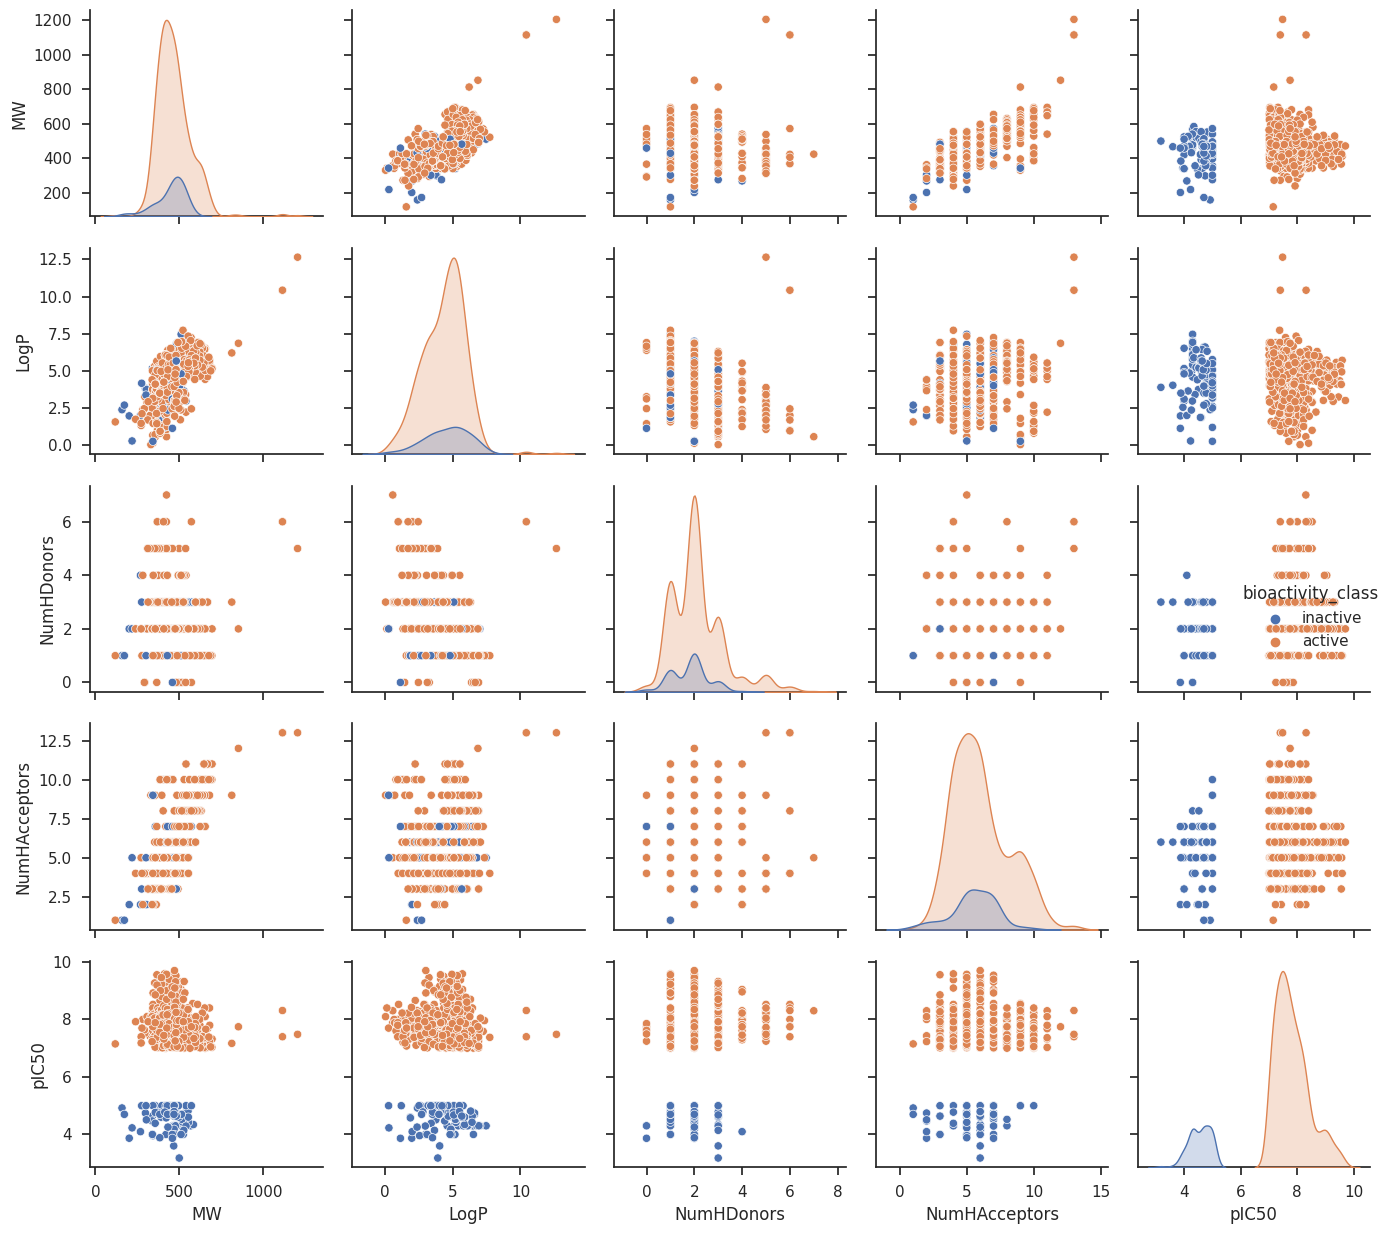

In [29]:
selection = ['bioactivity_class','MW','LogP','NumHDonors','NumHAcceptors','pIC50']
sns.pairplot(preprocessed_df[selection], hue='bioactivity_class')
plt.tight_layout()
plt.savefig('Pairplot.png',dpi=300)

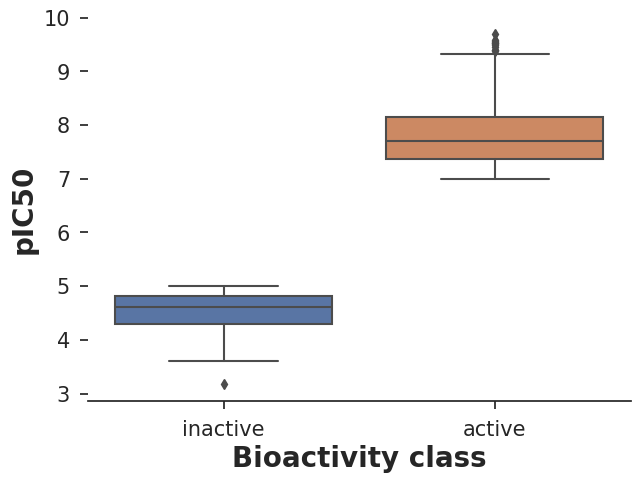

In [32]:
fig = plt.figure(figsize=(7,5))
sns.boxplot(x='bioactivity_class', y='pIC50', data = preprocessed_df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('pIC50', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
sns.despine(top=True, left=True)
plt.savefig('Boxplot_pIC50.png',dpi=300);

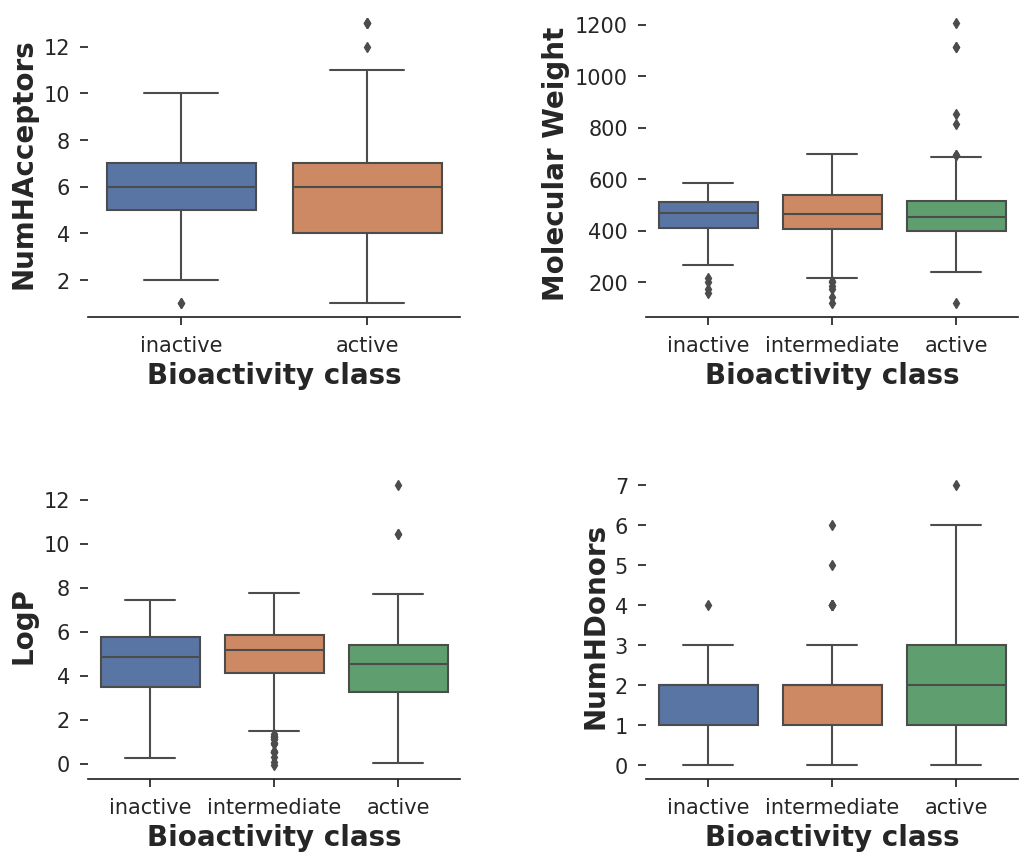

In [33]:
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=0.5,wspace=0.5)
fig.add_subplot(2,2,1)
sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data = preprocessed_df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('NumHAcceptors', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

fig.add_subplot(2,2,2)
sns.boxplot(x='bioactivity_class', y='MW', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('Molecular Weight', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

fig.add_subplot(2,2,3)
sns.boxplot(x='bioactivity_class', y='LogP', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('LogP', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

fig.add_subplot(2,2,4)
sns.boxplot(x='bioactivity_class', y='NumHDonors', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('NumHDonors', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

sns.despine(top=True, left=True)
plt.savefig('Boxplot_lipinksi_descriptors.png',dpi=300);

In [34]:
preprocessed_df.to_csv('AKT2_Inhibitors.csv')

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
# from xgboost import XGBClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


%matplotlib inline

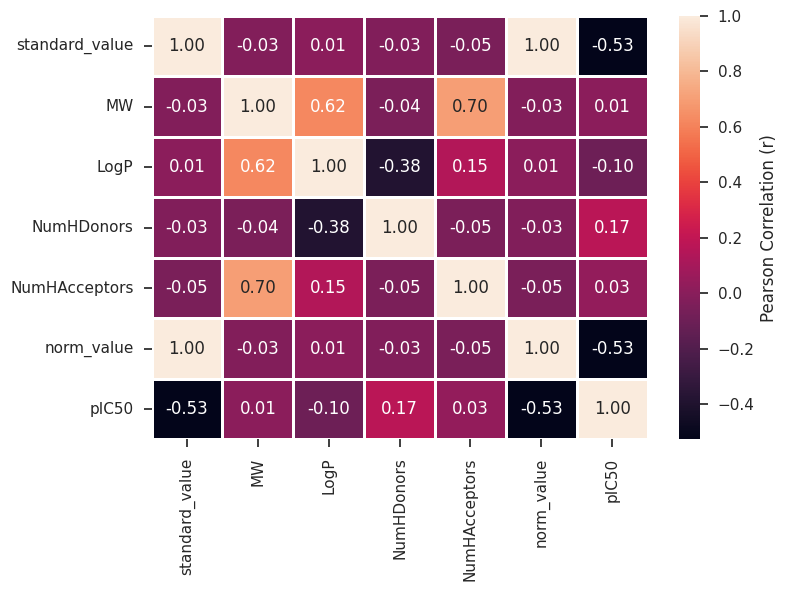

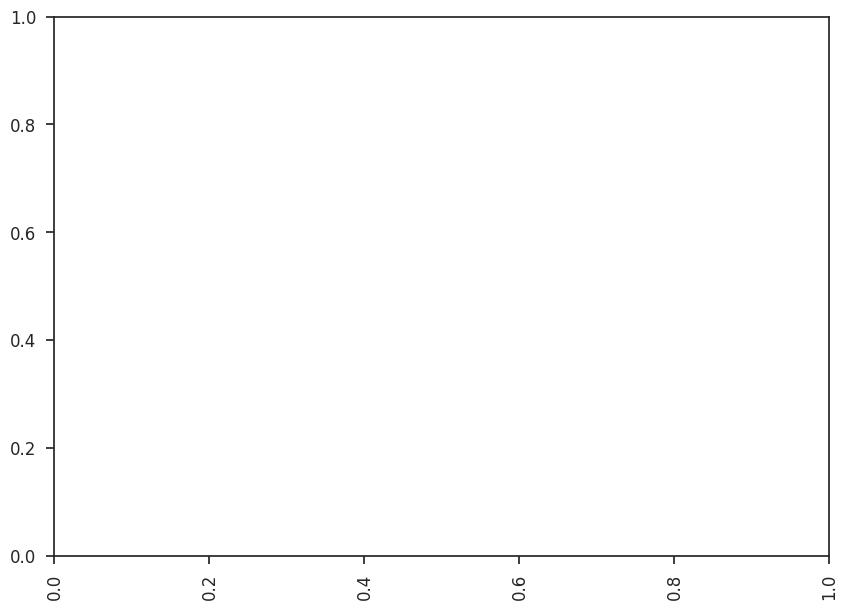

<Figure size 800x550 with 0 Axes>

In [36]:
# Select numeric columns only
numeric_df = preprocessed_df.select_dtypes(include='number')

# Compute correlation matrix
corr_mat = numeric_df.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_mat, fmt='0.2f', annot=True, lw=2, cbar_kws={'label':'Pearson Correlation (r)'})
plt.figure(figsize=(10,7))
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()
plt.tight_layout()
plt.savefig('Correlation.png',dpi=300);

In [37]:
! pip install --pre pycaret

In [38]:
! pip install pycaret[models]
from pycaret.classification import *

In [39]:
db=preprocessed_df.dropna(subset=['bioactivity_class'])

In [41]:
df = db.drop(['molecule_chembl_id','canonical_smiles','standard_value', 'pIC50'], axis=1)

In [42]:
df.head()

,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,norm_value
0,inactive,511.629,6.85620,1.0,6.0,50000.0
2,inactive,491.595,4.89242,2.0,5.0,20000.0
3,inactive,533.676,6.60710,2.0,7.0,20000.0
4,inactive,510.641,7.46120,1.0,5.0,50000.0
5,inactive,510.641,7.46120,1.0,5.0,50000.0


In [43]:
clf = setup(data = df, 
             target = 'bioactivity_class',
            session_id=123)

,Description,Value
0,Session id,123
1,Target,bioactivity_class
2,Target type,Binary
3,Target mapping,"active: 0, inactive: 1"
4,Original data shape,"(684, 6)"
5,Transformed data shape,"(684, 6)"
6,Transformed train set shape,"(478, 6)"
7,Transformed test set shape,"(206, 6)"
8,Numeric features,5
9,Rows with missing values,1.3%


In [44]:
top5 = compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6080
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0240
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0150
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0140
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1410
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0150
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0150
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0470
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0850
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0300


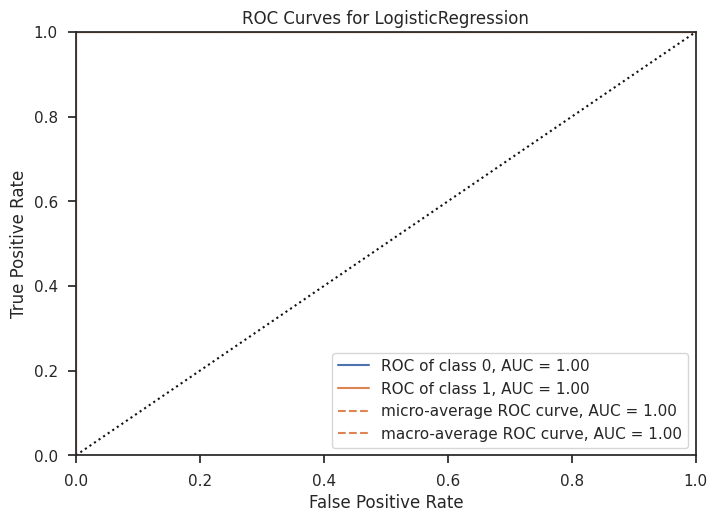

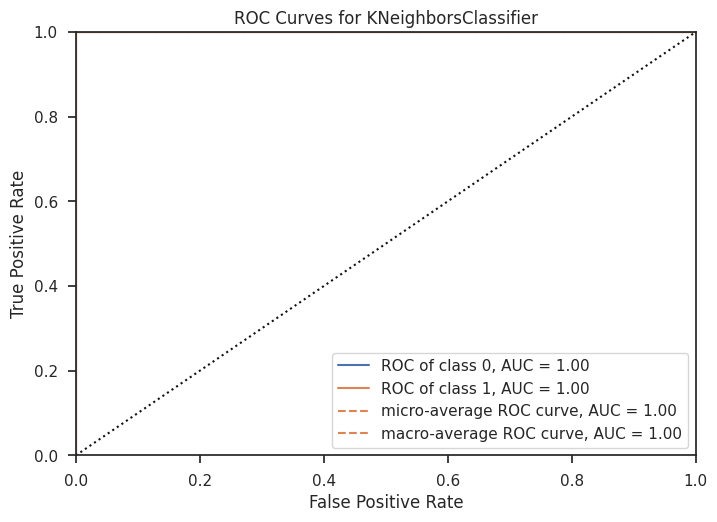

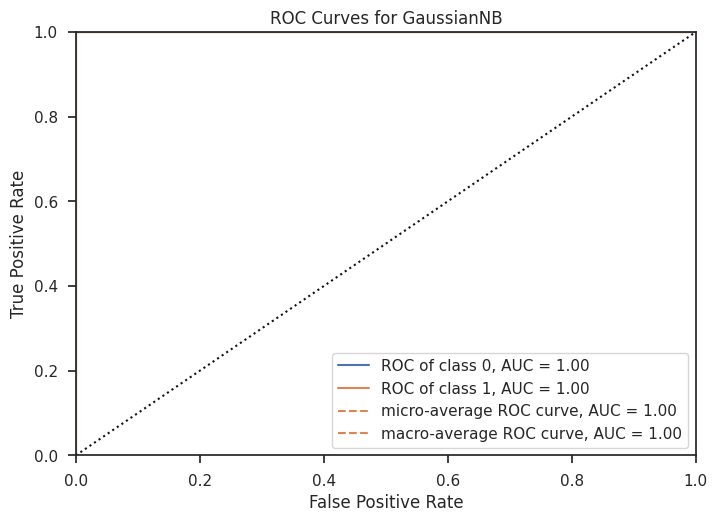

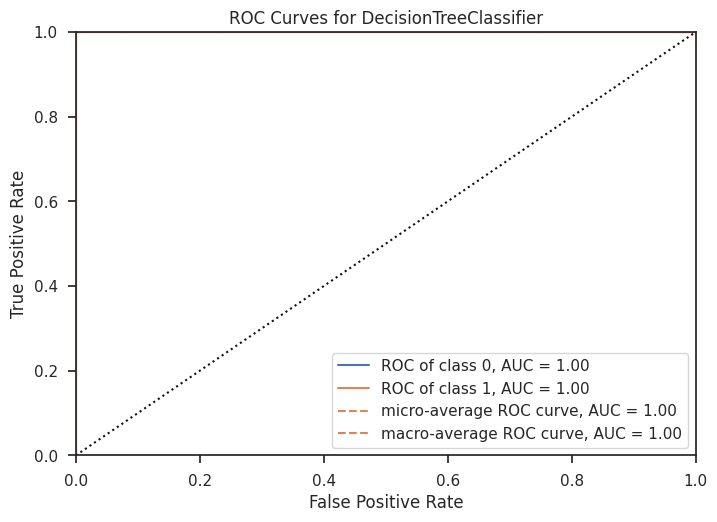

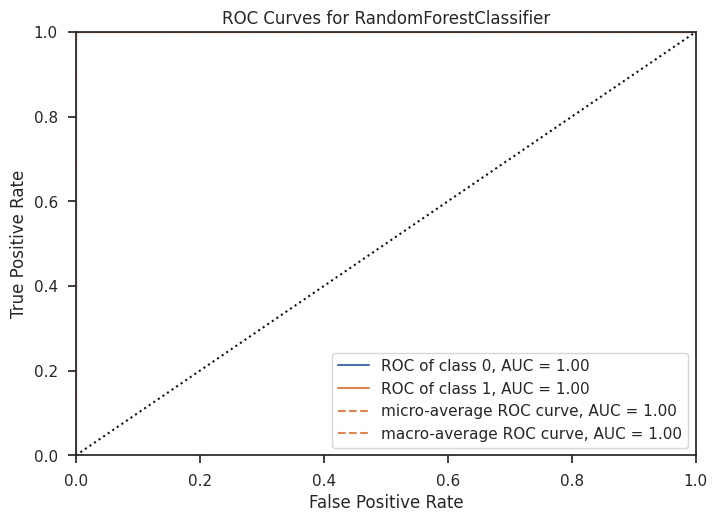

In [49]:
for model in top5:
    plot_model(model)

In [51]:
# Evaluate each model separately
for model in top5:
    evaluate_model(model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…